# Criando Nuvem de Palavras em Python


Vamos criar uma nuvem de palavras, ou *wordcloud*, usando biblioteca ```wordcloud```. Esse tipo de imagem é muito utilizado em análises e visualmente impactante.

## Passo 1 - Importando os dados

Para criar a nuvem de palavras, resolvei usar o corpus [leg2kids](http://www.nilc.icmc.usp.br/leg2kids/), apresentado pelo NILC (projeto de pesquisa e desenvolvimento de recursos, ferramentas e sistemas computacionais de processamento de línguas naturais, especialmente o português), que contém textos para crianças em português.

O corpus já está pré-processado, sentenciado e tokenizado pela ferramenta NLTK, contendo 153,791,083 *tokens*. Faça o *download* do corpus para seguir nossos passos.

Primeiramente, vamos instalar a biblioteca `wordcloud`:

```!pip install wordcloud -q``` (para uso no Colab)

Na sequencia, vamos importar os pacotes necessários.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Agora vamos importar nosso corpus, assumindo que já obtivemos o corpus.

In [2]:
# importar o arquivo
file = open(r"txt_unico/legendas.txt", "r", encoding='UTF-8')
df = pd.DataFrame(file)
df.columns = ['linhas']
df = df.sort_index()
file.close()

In [3]:
df.head()

,linhas
0,may the force be with us zeh rezinha guerra_ e...
1,"sua prima , delilah , te enviou um cartão em f..."
2,"nossa , as galinhas agora têm dvds dentro dela..."
3,a tecnologia está avançando muito rápido para ...
4,"bem , aqui vamos nós .\n"


In [4]:
len(df)

22034805

Como o dataset está muito grande (22.034.805 frases), vamos pegar apenas uma parte dele, para não ficar muito lento na hora de gerar a *wordcloud*. Após o código abaixo, temos a variável `df2`com 'apenas' 220.348 frases.

In [13]:
print(round(len(df)/100))
num_frases= round(len(df)/100)
print(num_frases)
df2 = df[0:num_frases]
len(df2)

220348
220348


220348

Precisamos agora juntar todas as frases em um único TXT.

In [23]:
# concatenar as frases
all_frases = " ".join(s for s in df2['linhas'])
print("Quantidade de Palavras: {}".format(len(all_frases)))

Quantidade de Palavras: 7479909


In [24]:
all_frases[100:150]

'iou um cartão em forma de galinha !\n nossa , as ga'

Vamos agora usar a a biblioteca `wordcloud`. Primero, vamos criar uma lista de **stopwords**, as palavras que devem ser removidas por serem irrelevantes. Isso ajuda a diminuir o tamanho do corpus e também a gerar uma nuvem com as palavras relevantes do texto.


In [33]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["a", "o", "e", "voce", "do", "da", "dos", "das", "meu", "em", "você", "de", "ao", "os", "ma", "é"])

Agora vamos instanciar um objeto do tipo `WordCloud` e fornecer os parâmetros, chamando na sequencia o método `generate()` para gerar a nuvem de palavras.

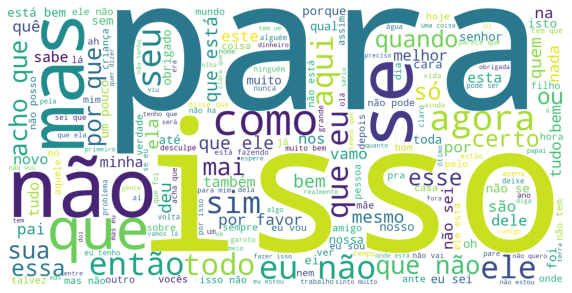

In [39]:
# configurando a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_frases)


fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# mostrar a imagem
plt.imshow(wordcloud);

# salvar a imagem no diretório
wordcloud.to_file("wordcloud.png")

Essas são as palavras mais frequentes ouvidas pelas crianças quando assistem filmes infantis (afinal, nosso corpus vem de legendas de filmes infantis).

## Nuvem de palavras sobre uma imagem

Um efeito legal é usar imagens como máscara na nuvem de palavra. Como estamos falando de um corpus infantil (*Leg2Kids*), que tal usar essa imagem?

<p align=center><img src="mickey.png" width="300px"></p>

A imagem deve apresentar valores em branco e preto para a máscara funcionar.

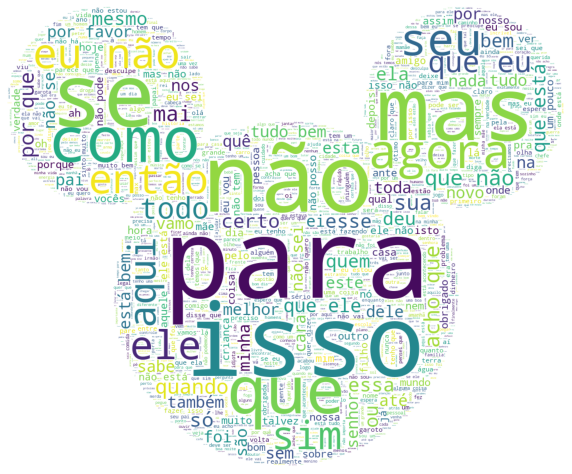

In [43]:
# endereço da imagem
img_mask = np.array(Image.open("img/mickey.png"))
   
# configurar wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=img_mask, max_font_size=200,
                      min_font_size=1).generate(all_frases)

# mostrar a imagem
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

# salvar no diretorio
wordcloud.to_file("wordcloud_mickey.png")

Fica bem legal. A biblioteca `wordcloud` permite escolher fonte, tamanho da fonte, quantidade máxima de palavras e cor do fundo, você pode configurar do seu jeito!